<a href="https://colab.research.google.com/github/owengenge/cap-comp215/blob/main/Project_1_Plotting_NEO's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project 1:** Plotting Potentially Hazardous Near Earth Objects

Name: Owen Genge

Date: Feb 19, 2023



In [62]:
import datetime, json, requests
from pprint import pprint   
from dataclasses import dataclass
import matplotlib.pyplot as plt


In [69]:
API_KEY = 'DEMO_KEY' 
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date=2023-02-23&end_date={today}&api_key={API_KEY}'
response = requests.request("GET", url, headers={}, data={})
data = json.loads(response.text)  # recall json.loads for lab 1


neos = data['near_earth_objects']
neos

{'2023-02-24': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2457662?api_key=DEMO_KEY'},
   'id': '2457662',
   'neo_reference_id': '2457662',
   'name': '457662 (2009 DZ)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2457662',
   'absolute_magnitude_h': 21.97,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1072889455,
     'estimated_diameter_max': 0.2399053753},
    'meters': {'estimated_diameter_min': 107.2889454508,
     'estimated_diameter_max': 239.9053752622},
    'miles': {'estimated_diameter_min': 0.0666662393,
     'estimated_diameter_max': 0.1490702429},
    'feet': {'estimated_diameter_min': 351.9978637928,
     'estimated_diameter_max': 787.0911513753}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2023-02-24',
     'close_approach_date_full': '2023-Feb-24 14:17',
     'epoch_date_close_approach': 1677248220000,
     'relative_velocity': {'kilometers_per_second': '10.0324227

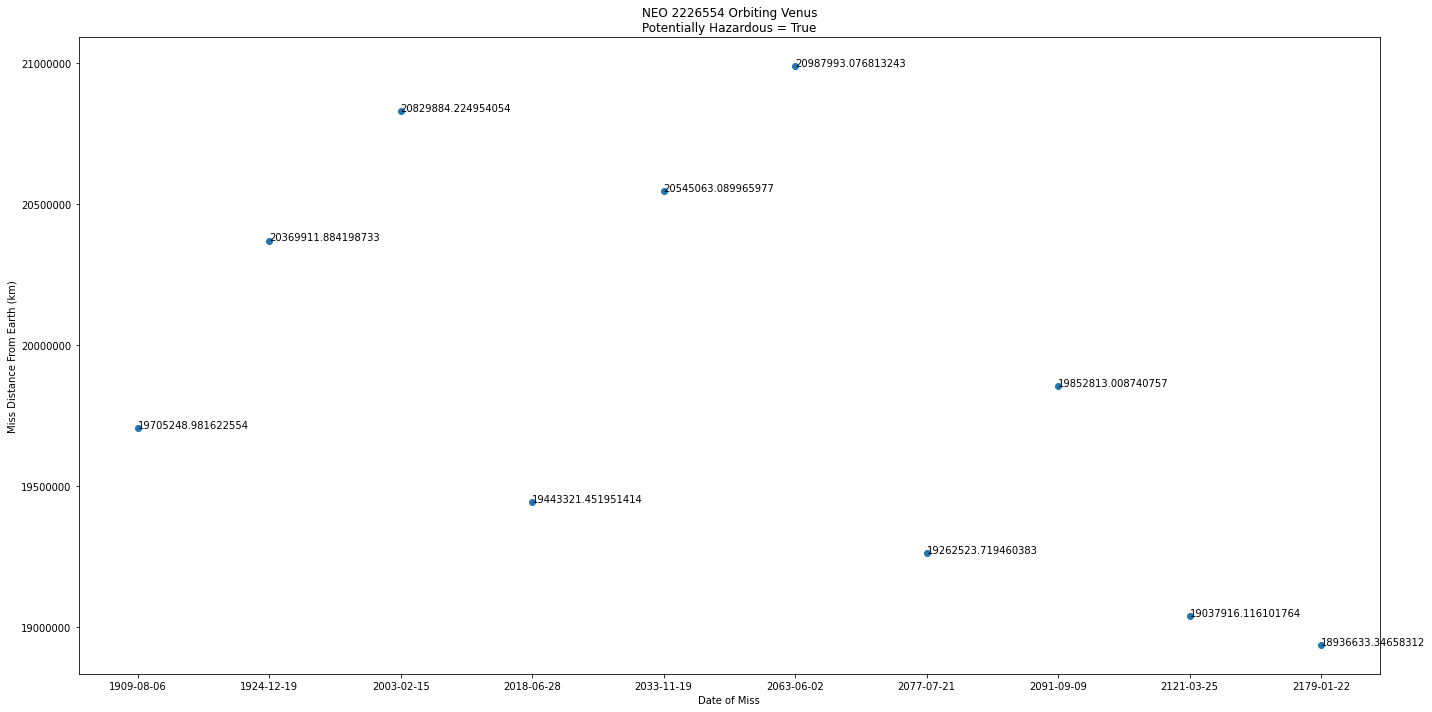

In [65]:
def ast_miss_data(orbiting_body, start_date, end_date, potentially_hazardous, id):
  ''' Displays a scatter plot of a NEO's distance from earth in a given time series. '''

  API_KEY = 'BQuTOmvJ8rJthGRwxNG8a02iQmcoaXEMxQ0rviXq'  
  url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}/?start_date={str(start_date)}&end_date={str(end_date)}&api_key={API_KEY}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)
  
  approach_data = data['close_approach_data']
  
  if data['is_potentially_hazardous_asteroid'] is potentially_hazardous:
    miss_distnaces = [float(item['miss_distance']['kilometers']) 
                    for item in approach_data if item['orbiting_body'] == str(orbiting_body)]
    approach_dates = [item['close_approach_date'] 
                    for item in approach_data if item['orbiting_body'] == str(orbiting_body)]
    
    plt.rcParams["figure.figsize"] = (len(approach_dates)*2, len(miss_distnaces))
    plt.title(f'NEO {id} Orbiting {orbiting_body}\nPotentially Hazardous = {potentially_hazardous}')
    plt.ylabel('Miss Distance From Earth (km)')
    plt.xlabel('Date of Miss')
    plt.ticklabel_format(style='plain')
    
    plt.scatter(approach_dates, miss_distnaces)
    for i, txt in enumerate(miss_distnaces):
      plt.annotate(txt, (approach_dates[i], miss_distnaces[i]))
    
    plt.show

  else:
    print(f'Cannot find data on NEO {id} with these parameters')
 
today = str(datetime.date.today())

ast_miss_data(orbiting_body='Venus', start_date='1920-01-01', end_date=today, potentially_hazardous=True, id='2226554')




